# Classification using TSLA with Centroids and ML (SVM)

In [ ]:
import numpy as np, cv2, os, random, math, matplotlib.pyplot as plt, random, pandas as pd #, mahotas as mt, 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset upload

In [ ]:
drive_path = '/content/drive/MyDrive/TSLA/'
dataset = pd.read_csv(drive_path + 'TSLA_centroid_flavia_28_contour_points.csv')
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,./Leaves/1001.jpg,0.177461,0.903446,61.644380,0.260866,0.798236,44.944883,0.396223,0.606380,8.447053,...,9.120516,0.194805,0.805333,2.400928,0.290584,0.768600,43.350496,0.376617,0.624385,5.292319
1,./Leaves/1002.jpg,0.200377,0.801838,9.530087,0.446304,0.593406,32.104104,0.330067,0.672374,8.511067,...,94.422139,0.197339,0.802872,2.953922,0.099391,0.909594,25.818577,0.308603,0.967660,93.033067
2,./Leaves/1003.jpg,0.198977,0.803517,10.138746,0.439573,0.602332,33.026981,0.328580,0.673845,8.491862,...,94.244111,0.195361,0.804893,3.256374,0.099737,0.910559,27.619837,0.321489,0.976739,95.241732
3,./Leaves/1004.jpg,0.644479,0.984824,107.666480,0.484205,0.780533,78.065167,0.393428,0.609240,8.561627,...,65.777127,0.200359,0.800925,7.254996,0.376308,0.682281,40.082633,0.333005,0.684753,22.863322
4,./Leaves/1005.jpg,0.511307,0.832310,86.913724,0.593642,0.903120,99.016086,0.385134,0.616917,7.539041,...,80.333760,0.191366,0.808648,0.754596,0.346332,0.754828,53.596611,0.328102,0.702522,30.105247


## Label Creation

In [ ]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [ ]:
path="/content/drive/MyDrive/Leaves"
img_files = os.listdir(path)
img_files.sort()

In [ ]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [ ]:
y = np.array(target_list)

## Training with degrees angles

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test, y_train, y_test = train_test_split(dataset, y, train_size= 0.8,test_size=0.2,stratify=y)

In [ ]:
y_train[0:10]

array([ 2, 18, 14, 16, 31, 15, 28,  6,  4,  0])

In [ ]:
X_train, X_test = data_train, data_test

In [ ]:
im_train_names = list(X_train['0'].values)
X_train = X_train.drop('0', axis=1)
im_test_names = list(X_test['0'].values)
X_test = X_test.drop('0', axis=1)

## Normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Applying SVM Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel = 'rbf', C = 1000, gamma=1e-3).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8534031413612565

#### Score per class

In [ ]:
def get_metrics(l):
    class_s = []
    precision = []
    recall = []
    f1_score = []
    support = []
    for line in l[2:34]:
        class_s.append(int(line.split('      ')[1]))
        precision.append(float(line.split('      ')[2]))
        recall.append(float(line.split('      ')[3]))
        f1_score.append(float(line.split('      ')[4]))
        support.append(int(line.split('      ')[5]))

    return class_s, precision, recall, f1_score, support


In [ ]:
l = str(metrics.classification_report(y_test, y_pred)).split('\n')

class_s, precision, recall, f1_score, support = get_metrics(l)

In [ ]:
df_clf_report_linear = pd.DataFrame(
    data = {
        'class': class_s, 'precision': precision, 'recall': recall,
        'f1_score': f1_score, 'support': support 
    }
)

In [ ]:
df_clf_report_linear[df_clf_report_linear.f1_score < 0.8]

,class,precision,recall,f1_score,support
1,1,0.64,0.69,0.67,13
8,8,0.78,0.64,0.70,11
10,10,0.56,0.50,0.53,10
12,12,0.75,0.60,0.67,10
14,14,0.60,0.75,0.67,12
15,15,0.67,0.55,0.60,11
21,21,0.75,0.82,0.78,11
22,22,0.64,0.64,0.64,11
24,24,0.75,0.55,0.63,11
27,27,0.75,0.82,0.78,11


## Setting the hyper-parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [ ]:
svm_clf = GridSearchCV(SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
svm_clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

##### All the parameters with their means and standard deviation

In [ ]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.156 (+/-0.038) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.596 (+/-0.041) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.772 (+/-0.030) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.674 (+/-0.031) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.535 (+/-0.011) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.279 (+/-0.028) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.601 (+/-0.034) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.791 (+/-0.030) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.843 (+/-0.034) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.698 (+/-0.037) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.561 (+/-0.020) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.317 (+/-0.032) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.787 (+/-0.032) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.840 (+/-0.041) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.841 (+/-0.044) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.698 (+/-0.037) for {'C': 100, 'gamma': 0.1, 'kernel':

#### Predicting the Test dataset and showing the score

In [ ]:
y_pred_svm = svm_clf.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_svm)

0.8743455497382199

#### The score of each class

![F1-score](F1-Score.png)

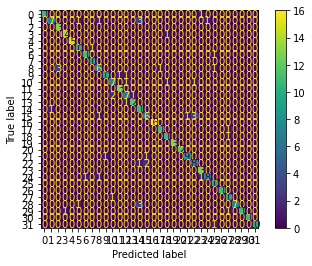

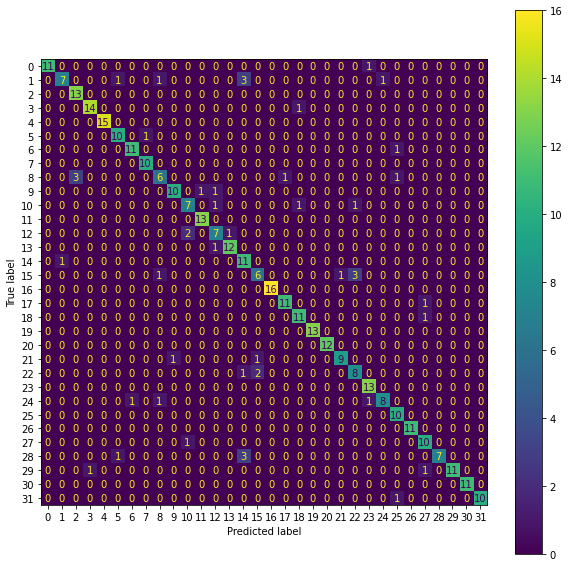

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cmp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
fig, ax = plt.subplots(figsize=(10,10))
cmp.plot(ax=ax)

In [ ]:
l = str(metrics.classification_report(y_test, y_pred_svm)).split('\n')

class_s, precision, recall, f1_score, support = get_metrics(l)

df_clf_report_rbf = pd.DataFrame(
    data = {
        'class': class_s, 'precision': precision, 'recall': recall,
        'f1_score': f1_score, 'support': support 
    }
)

In [ ]:
df_clf_report_rbf [df_clf_report_rbf.f1_score <= 0.8]

,class,precision,recall,f1_score,support
1,1,0.88,0.54,0.67,13
8,8,0.67,0.55,0.60,11
10,10,0.70,0.70,0.70,10
12,12,0.70,0.70,0.70,10
14,14,0.61,0.92,0.73,12
15,15,0.67,0.55,0.60,11
22,22,0.67,0.73,0.70,11
24,24,0.89,0.73,0.80,11
28,28,1.00,0.64,0.78,11


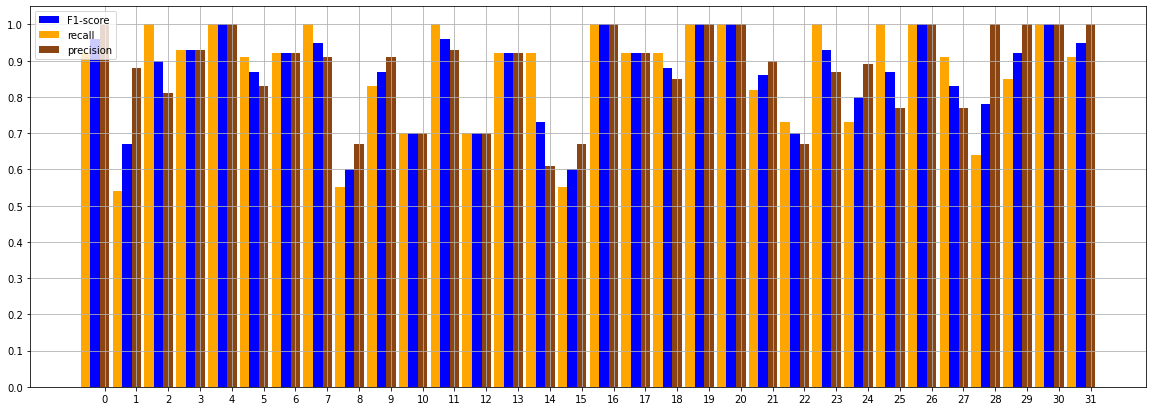

In [ ]:
plt.figure(figsize=(20,7))

plt.xticks([x for x in range(0, 32, 1)])
plt.yticks([x for x in np.arange(0, 1.1, 0.1)])
plt.grid(True)

class_labels = [x - 0.3 for x in df_clf_report_rbf['class'].values]
plt.bar(class_labels, df_clf_report_rbf['f1_score'].values, label="F1-score", color=(0, 0, 1), width=0.3)

class_labels = [x - 0.6 for x in df_clf_report_rbf['class'].values]
plt.bar(class_labels, df_clf_report_rbf['recall'].values, label="recall", color=(255/255, 165/255, 0), width=0.3)

class_labels = [f'{x}' for x in df_clf_report_rbf['class'].values]
plt.bar(class_labels, df_clf_report_rbf['precision'].values, label="precision", color=(139/255, 69/255, 19/255), width=0.3)

plt.legend()

In [ ]:
T_F_values = pd.DataFrame(
    data = {
        'image_name': im_test_names, 
        'true_class': y_test, 
        'predicted_class': y_pred_svm
    }
)

In [ ]:
T_F_values_non = T_F_values[T_F_values.true_class != T_F_values.predicted_class]
T_F_values_non = T_F_values_non.reset_index()
T_F_values_non = T_F_values_non.drop('index', axis=1)

In [ ]:
T_F_values_non[T_F_values_non.true_class == 8]

,image_name,true_class,predicted_class
2,./Leaves/1514.jpg,8,24
3,./Leaves/1522.jpg,8,28
14,./Leaves/1524.jpg,8,2


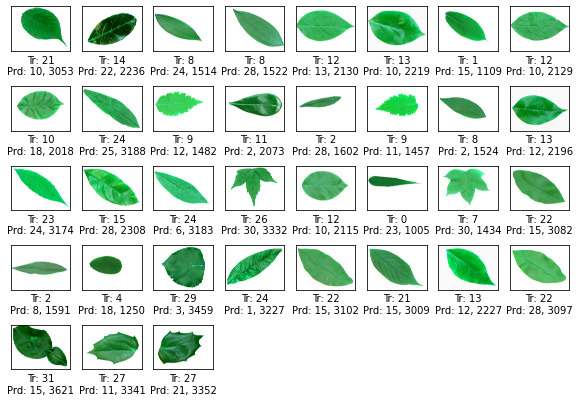

In [ ]:

plt.figure(figsize=(10,10))
for i in range(len(T_F_values_non)):
    plt.subplot(7,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im_name = T_F_values_non.iloc[i]['image_name'].split('/')[-1]
    img_path = path + '/' + im_name
    img  = cv2.imread(img_path)
    plt.imshow(img)
    tr_clss = 'Tr: ' + str(T_F_values_non.iloc[i]['true_class'])
    pr_clss = 'Prd: ' + str(T_F_values_non.iloc[i]['predicted_class'])
    name_ = str(T_F_values_non.iloc[i]['image_name'])
    name_ = name_.split('/')[-1].split('.')[0]
    image_label = tr_clss + '\n' + pr_clss + ', ' + name_
    plt.xlabel(image_label)
plt.show()
